In [140]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_bvp

## First task

In [106]:
N = 100
x = np.linspace(0,1,N)
dx = x[1] - x[0]

In [107]:
deriv = np.zeros((N, N))
i, j = np.indices(deriv.shape)
deriv[i==j-1] = 1/2/dx
deriv[i==j+1] = -1/2/dx
deriv[-1, -1] = 0
deriv[-2, -1] = 0
deriv[-1, -2] = -1/dx
deriv[0, 0] = 1
deriv[0, 1] = 0

support = (x.reshape(-1, 1))@np.ones(N).reshape(1, -1)
deriv = deriv * (1 - 4*support)

In [108]:
deriv2 = np.zeros((N, N))
i, j = np.indices(deriv2.shape)
deriv2[i==j-1] = 1/dx**2
deriv2[i==j+1] = 1/dx**2
deriv2[i==j] = -2/dx**2
deriv2[-1, -1] = 0
deriv2[-2, -1] = 0
deriv2[-1, -2] = -2/dx**2
deriv2[-1, -3] = 1/dx**2
deriv2[0, 0] = -1/dx**2 - 1/dx
deriv2[0, 1] = 1/dx**2

In [109]:
A = deriv2 + deriv + 8*np.eye(N)
b = 5*np.ones(N)

In [110]:
y = np.linalg.inv(A)@b
y[-1] = 0

In [111]:
y_real = -2*x**2+x + 1

In [112]:
np.linalg.norm(y_real-y)/np.linalg.norm(y_real)

0.005391506779819615

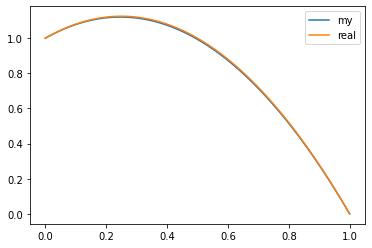

In [113]:
plt.plot(x, y, label='my')
plt.plot(x, y_real, label='real')
plt.legend()
plt.show()

## Second task

Метод дифференциальной прогонки можно использовать для решения краевых задач вида $y''(x)=f(x,y,y')$ с заданными граничными условиями $y(a)=\alpha$ и $y(b)=\beta$. В этой задаче мы имеем такое же дифференциальное уравнение, но в граничных условиях вместо значений $y$ используются производные $y'(0)$ и $y'(\pi/2)$.

Чтобы использовать метод дифференциальной прогонки, нам нужно преобразовать граничные условия в вид $y(a)=\alpha$ и $y(b)=\beta$. Мы можем сделать это, проинтегрировав дифференциальное уравнение один раз, чтобы получить $y'(x)=-y(x)+x\cos x + C_1$ для некоторой константы $C_1$. Тогда заданные граничные условия принимают вид $y(0)=\alpha$ и $y(\pi/2)=\beta$ требуемого вида. Однако нам все еще нужно определить значение $C_1$, чтобы получить единственное решение.

Для определения $C_1$ можно использовать начальное условие $y'(0)=3y(0)+2$ и тот факт, что $y'(x)$ непрерывна на $[0,\pi/2]$ потому что это решение дифференциального уравнения. Это дает нам уравнение $-y(0)+C_1=3y(0)+2$ или эквивалентно $C_1=4y(0)+2$.

К сожалению, мы не можем определить значение $y(0)$ из заданных граничных условий. Условие $y'(\pi/2)=-5y(\pi/2)+2$ определяет только значение $y(\pi/2)$, и нет никакой информации о производной или значении $ y$ в любой другой точке интервала $[0,\pi/2]$. Следовательно, мы не можем найти единственное решение, используя метод дифференциальной прогонки.

## Fifth task

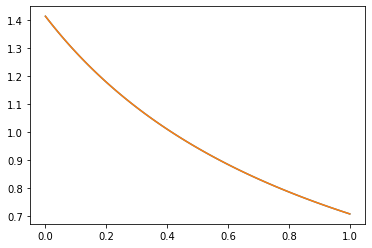

In [142]:
# Define the boundary value problem
def fun(x, y):
    return np.vstack((y[1], y[0]**3))

def bc(ya, yb):
    return np.array([ya[0]-np.sqrt(2), yb[0]-1/np.sqrt(2)])

# Define the initial mesh
x = np.linspace(0, 1, 5)
y = np.vstack((np.sqrt(2)*np.ones_like(x), np.zeros_like(x)))

# Solve the boundary value problem
sol = solve_bvp(fun, bc, x, y)

# Plot the solution
x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
y_real = np.sqrt(2)/(1+x_plot)
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_real)
plt.show()